#Exercise 2:
 Try Linear regression on same prediction data using Tensorflow

In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [67]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [68]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples)
targets = np.array([[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], dtype='float32')

In [69]:
df_inputs = pd.DataFrame(inputs, columns = ['temp','rainfall','humidity'])
x_train = df_inputs[:10]
x_test = df_inputs[10:] 

df_targets = pd.DataFrame(targets, columns = ['apples'])
y_train =  df_targets[:10]
y_test = df_targets[10:]

In [70]:
x_train

,temp,rainfall,humidity
0,73.0,67.0,43.0
1,91.0,88.0,64.0
2,87.0,134.0,58.0
3,102.0,43.0,37.0
4,69.0,96.0,70.0
5,73.0,67.0,43.0
6,91.0,88.0,64.0
7,87.0,134.0,58.0
8,102.0,43.0,37.0
9,69.0,96.0,70.0


In [71]:
x_test

,temp,rainfall,humidity
10,73.0,67.0,43.0
11,91.0,88.0,64.0
12,87.0,134.0,58.0
13,102.0,43.0,37.0
14,69.0,96.0,70.0


In [72]:
y_train

,apples
0,56.0
1,81.0
2,119.0
3,22.0
4,103.0
5,56.0
6,81.0
7,119.0
8,22.0
9,103.0


In [73]:
y_test

,apples
10,56.0
11,81.0
12,119.0
13,22.0
14,103.0


In [74]:
from sklearn.preprocessing import Normalizer
import sklearn.preprocessing

In [75]:
normalizer = preprocessing.Normalization(axis = -1)
normalizer.adapt(np.array(x_train))

In [76]:
lin_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = 1)
])

In [77]:
lin_model.predict(x_train[:9])

array([[ 0.70441705],
       [-0.03911492],
       [-1.5619746 ],
       [ 0.09605615],
       [ 0.8006163 ],
       [ 0.70441705],
       [-0.03911492],
       [-1.5619746 ],
       [ 0.09605615]], dtype=float32)

In [78]:
lin_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate = 0.2),
    loss='mean_absolute_error')


In [79]:
lin_model.fit(
    x_train, y_train, 
    epochs = 2000,  
    verbose=0,
    validation_split = 0.3) # validation results on 30% of data

In [80]:
res = {}
res['lin_model'] = lin_model.evaluate(x_test, y_test, verbose = 0)
res['lin_model']

0.8784080743789673

In [81]:
y = lin_model.predict(x_test['rainfall'])
y

array([[ 72.32589],
       [ 96.27684],
       [148.74083],
       [ 44.95337],
       [105.40101]], dtype=float32)

In [82]:
def plot_linear_reg(x, y):
  plt.scatter(x_train['rainfall'], y_train['apples'], label = 'Data')
  plt.plot(x, y, color='r', label = 'Predictions')
  plt.xlabel('Rainfall')
  plt.ylabel('Apples')
  plt.legend()

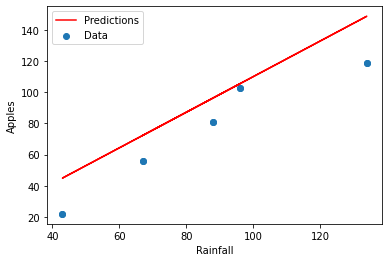

In [83]:
plot_linear_reg(x_test['rainfall'], y)